# WeatherPy
#### Observations

* As latitude approaches 0&deg;, the maximum temperature of a city increases. This supports the idea that the weather gets hotter as one approaches the equator. Though it is noteworthy to point out that, of the given data set, maximum temperature peaks between 20&deg;N and 40&deg;N, rather than at the equator.


* It appears that the majority of cities in the data set have humidity levels between 60-100%, regardless of latitude. However, cities with low humidity levels (0-20%) are mostly concentrated to latitudes between 20&deg;N and 40&deg;N.


* Like humidity, a city's wind speed does not seem to be as influenced by latitude as maximum temperature is. The majority of cities have a wind speed between 0-4 mph across the latitudinal range of 60&deg;S and 80&deg;N.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Included a print log of each city as it is being processed (with the city number and city name).


In [4]:
# Create empty data frame to store information
df = pd.DataFrame({
    "City": cities,
    "Cloudiness": "",
    "Country": "",
    "Date": "",
    "Humidity": "",
    "Lat": "",
    "Lng": "",
    "Max Temp (C)": "",
    "Wind Speed": ""
})

In [21]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

for index, row in df.iterrows():
    
    city = row['City']
    query_url = f"{base_url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {index} of {len(cities)} | {city}")
    
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp (C)'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 0 of 606 | rikitea
Processing Record 1 of 606 | cherskiy
Processing Record 2 of 606 | aktash
City not found. Skipping...
Processing Record 3 of 606 | new norfolk
Processing Record 4 of 606 | ribeira grande
Processing Record 5 of 606 | emboscada
Processing Record 6 of 606 | hermanus
Processing Record 7 of 606 | tromso
Processing Record 8 of 606 | qaanaaq
Processing Record 9 of 606 | atuona
Processing Record 10 of 606 | bredasdorp
Processing Record 11 of 606 | vaitupu
City not found. Skipping...
Processing Record 12 of 606 | torbay
Processing Record 13 of 606 | barrow
Processing Record 14 of 606 | vaitape
Processing Record 15 of 606 | bayir
Processing Record 16 of 606 | mataura
Processing Record 17 of 606 | hilo
Processing Record 18 of 606 | soe
Processing Record 19 of 606 | ponta do sol
Processing Record 20 of 606 | punta arenas
Processing Record 21 of 606 | thompson
Processing Record 22 of 606 | khatanga
Processing Record 23 of 606 | biryusinsk
Processing Record 24 of

Processing Record 191 of 606 | kadykchan
City not found. Skipping...
Processing Record 192 of 606 | elko
Processing Record 193 of 606 | avera
Processing Record 194 of 606 | hongjiang
Processing Record 195 of 606 | burica
City not found. Skipping...
Processing Record 196 of 606 | kumluca
Processing Record 197 of 606 | tasiilaq
Processing Record 198 of 606 | manggar
Processing Record 199 of 606 | kodiak
Processing Record 200 of 606 | lazaro cardenas
Processing Record 201 of 606 | marsh harbour
Processing Record 202 of 606 | palauig
Processing Record 203 of 606 | cooma
Processing Record 204 of 606 | aklavik
Processing Record 205 of 606 | elizabeth city
Processing Record 206 of 606 | biskamzha
Processing Record 207 of 606 | vostok
Processing Record 208 of 606 | san jeronimito
Processing Record 209 of 606 | ancud
Processing Record 210 of 606 | koyelga
Processing Record 211 of 606 | gopamau
Processing Record 212 of 606 | caravelas
Processing Record 213 of 606 | leningradskiy
Processing Recor

Processing Record 385 of 606 | sosnovo-ozerskoye
Processing Record 386 of 606 | morros
Processing Record 387 of 606 | panaba
Processing Record 388 of 606 | san policarpo
Processing Record 389 of 606 | bella vista
Processing Record 390 of 606 | luganville
Processing Record 391 of 606 | ponta delgada
Processing Record 392 of 606 | jiujiang
Processing Record 393 of 606 | ilulissat
Processing Record 394 of 606 | chhaprauli
Processing Record 395 of 606 | okahandja
Processing Record 396 of 606 | gurgan
City not found. Skipping...
Processing Record 397 of 606 | pevek
Processing Record 398 of 606 | beyneu
Processing Record 399 of 606 | shymkent
Processing Record 400 of 606 | coihaique
Processing Record 401 of 606 | tilichiki
Processing Record 402 of 606 | college
Processing Record 403 of 606 | salalah
Processing Record 404 of 606 | ismailia
Processing Record 405 of 606 | lebork
Processing Record 406 of 606 | voi
Processing Record 407 of 606 | nizhniy kuranakh
Processing Record 408 of 606 | bet

Processing Record 574 of 606 | nortelandia
Processing Record 575 of 606 | chapais
Processing Record 576 of 606 | cockburn town
Processing Record 577 of 606 | plettenberg bay
Processing Record 578 of 606 | baiao
Processing Record 579 of 606 | rocha
Processing Record 580 of 606 | robertsport
Processing Record 581 of 606 | shimoda
Processing Record 582 of 606 | carauari
Processing Record 583 of 606 | gat
Processing Record 584 of 606 | ca mau
Processing Record 585 of 606 | nguiu
City not found. Skipping...
Processing Record 586 of 606 | mattru
Processing Record 587 of 606 | lavrentiya
Processing Record 588 of 606 | bairiki
City not found. Skipping...
Processing Record 589 of 606 | marabba
Processing Record 590 of 606 | oranjemund
Processing Record 591 of 606 | kasangulu
Processing Record 592 of 606 | jabiru
City not found. Skipping...
Processing Record 593 of 606 | ondjiva
Processing Record 594 of 606 | ixtapa
Processing Record 595 of 606 | shatsk
Processing Record 596 of 606 | turukhansk


## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display a preview of the data frame

In [22]:
df.to_csv(output_data_file)
df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (C),Wind Speed
0,rikitea,9,PF,1561943718,58,-23.12,-134.97,20.95,4.91
1,cherskiy,100,RU,1561943718,91,68.75,161.3,3.85,3.13
2,aktash,,,,,,,,
3,new norfolk,20,AU,1561943504,44,-42.78,147.06,17.22,5.7
4,ribeira grande,98,PT,1561943719,92,38.52,-28.7,20.15,7.33
5,emboscada,90,PY,1561943719,93,-25.13,-57.35,16,5.7
6,hermanus,99,ZA,1561943175,68,-34.42,19.24,15,2.68
7,tromso,40,NO,1561943720,75,69.65,18.96,11,10.3
8,qaanaaq,2,GL,1561943184,49,77.48,-69.36,10.35,1.34
9,atuona,76,PF,1561942921,72,-9.8,-139.03,26.85,4.79


### Latitude vs. Temperature Plot

In [32]:
df['Lat'] = pd.to_numeric(df['Lat'])

def charts(y, c, title, ylabel, save):
    df.plot(kind='scatter',x='Lat', y=y, c=c, colormap='inferno',sharex=False, figsize=(8,5))
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.grid()
    plt.savefig(save)
    plt.show()

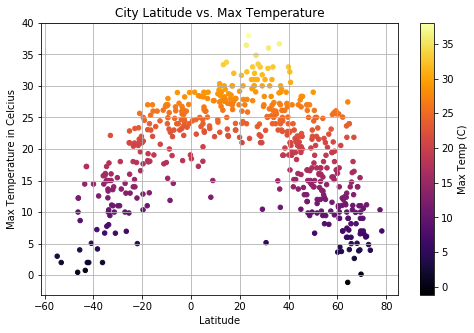

In [33]:
df['Max Temp (C)'] = pd.to_numeric(df['Max Temp (C)'])

charts('Max Temp (C)',
       'Max Temp (C)',
       'City Latitude vs. Max Temperature',
       'Max Temperature in Celcius',
       'output_data/latvtemp.png')

### Latitude vs. Humidity Plot

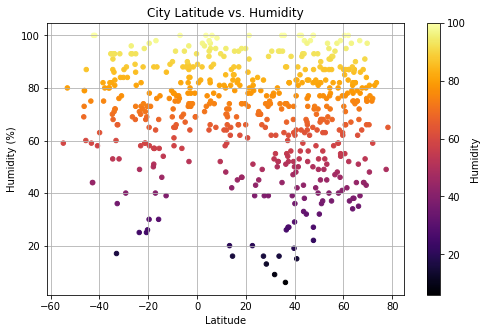

In [34]:
df['Humidity'] = pd.to_numeric(df['Humidity'])

charts('Humidity',
       'Humidity',
       'City Latitude vs. Humidity',
       'Humidity (%)',
       'output_data/latvhumidity.png')

### Latitude vs. Cloudiness Plot

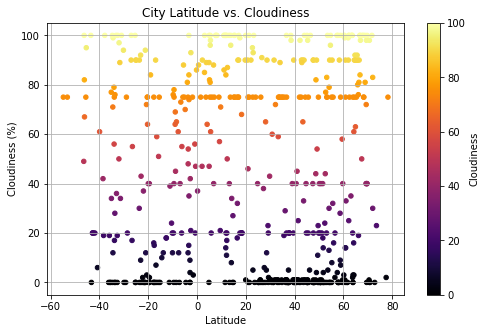

In [35]:
df['Cloudiness'] = pd.to_numeric(df['Cloudiness'])

charts('Cloudiness',
       'Cloudiness',
       'City Latitude vs. Cloudiness',
       'Cloudiness (%)',
       'output_data/latvcloud.png')

### Latitude vs. Wind Speed Plot

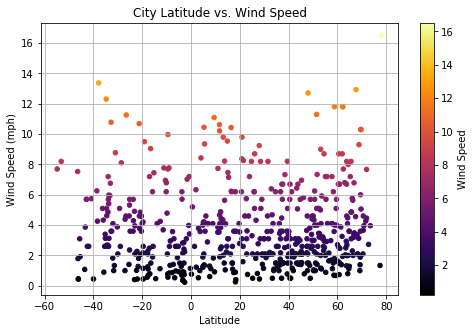

In [36]:
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'])

charts('Wind Speed',
       'Wind Speed',
       'City Latitude vs. Wind Speed',
       'Wind Speed (mph)',
       'output_data/latvwind.png')